In [1]:
import time
t0 = time.time()

In [2]:
import warnings, logging
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In [3]:
# enhance text display
!pip install rich
!python -m pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install "paddleocr>=2.0.1"
!pip install pillow numpy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [4]:
from rich import (print, inspect, pretty)
import urllib.request
import numpy as np
from PIL import Image
pretty.install()

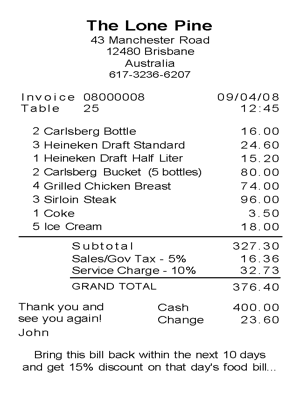

In [5]:
# pull a random receipt image from internet
image_url='https://groups.google.com/group/jzebra-users/attach/d16dbba8a612edfa/Bill%20Image_Receipt.png?part=0.1'
local_image_id='bill_image_receipt.png'
urllib.request.urlretrieve(image_url,local_image_id)
receipt_image = Image.open(local_image_id)
receipt_image_array = np.array(receipt_image.convert('RGB'))
display(receipt_image.resize((300,400)))

In [6]:
%%time
from paddleocr import PaddleOCR, draw_ocr
from ast import literal_eval
import json

paddleocr = PaddleOCR(lang="en",ocr_version="PP-OCRv4",show_log = False,use_gpu=True)

def paddle_scan(paddleocr,img_path_or_nparray):
    result = paddleocr.ocr(img_path_or_nparray,cls=True)
    result = result[0]
    boxes = [line[0] for line in result]       #boundign box
    txts = [line[1][0] for line in result]     #raw text
    scores = [line[1][1] for line in result]   # scores
    return  txts, result

# perform ocr scan
receipt_texts, receipt_boxes = paddle_scan(paddleocr,receipt_image_array)
print(50*"--","\ntext only:\n",receipt_texts)
print(50*"--","\nocr boxes:\n",receipt_boxes)

---------------------------------------------------------------------------------------------------- 
text only:

[
    'The Lone Pine',
    '43 Manchester Road',
    '12480 Brisbane',
    'Australia',
    '617-3236-6207',
    'Invoice 08000008',
    '09/04/08',
    'Table',
    '25',
    '12:45',
    '2 Carlsberg Bottle',
    '16.00',
    '3 Heineken Draft Standard.',
    '24.60',
    '1 Heineken Draft Half Liter.',
    '15.20',
    '2 Carlsberg Bucket (5 bottles).',
    '80.00',
    '4 Grilled Chicken Breast.',
    '74.00',
    '3 Sirloin Steak',
    '96.00',
    '1 Coke',
    '3.50',
    '5 Ice Cream',
    '18.00',
    'Subtotal',
    '327.30',
    'Sales/Gov Tax - 5%',
    '16.36',
    'Service Charge - 10%',
    '32.73',
    'GRAND TOTAL',
    '376.40',
    'Thank you and',
    'Cash',
    '400.00',
    'see you again!',
    'Change',
    '23.60',
    'John',
    'Bring this bill back within the next 10 days',
    "and get 15% discount on that day's food bill.."
]

---------------------------------------------------------------------------------------------------- 
ocr boxes:

[
    [[[188.0, 54.0], [453.0, 54.0], [453.0, 85.0], [188.0, 85.0]], ('The Lone Pine', 0.9998095035552979)],
    [[[194.0, 96.0], [449.0, 98.0], [449.0, 122.0], [194.0, 120.0]], ('43 Manchester Road', 0.9988952279090881)],
    [[[228.0, 127.0], [416.0, 130.0], [416.0, 154.0], [228.0, 151.0]], ('12480 Brisbane', 0.9698792099952698)],
    [[[267.0, 162.0], [375.0, 162.0], [375.0, 186.0], [267.0, 186.0]], ('Australia', 0.9997159242630005)],
    [[[234.0, 193.0], [409.0, 193.0], [409.0, 216.0], [234.0, 216.0]], ('617-3236-6207', 0.9996877312660217)],
    [[[46.0, 255.0], [308.0, 255.0], [308.0, 278.0], [46.0, 278.0]], ('Invoice 08000008', 0.9920088052749634)],
    [[[466.0, 255.0], [598.0, 255.0], [598.0, 278.0], [466.0, 278.0]], ('09/04/08', 0.9994741082191467)],
    [[[42.0, 283.0], [132.0, 283.0], [132.0, 311.0], [42.0, 311.0]], ('Table', 0.9968875646591187)],
    [[[174.0, 283.0], [214.0, 283.0], [214.0, 311.0], [174.0, 311.0]], ('25', 0.9997905492782593)],
    [[[514.0, 284.0], [601.0, 284.0], [601.0, 311.0], [514.0, 311.0]], ('12:45', 0.9965111017227173)],
    [[[67.0, 346.0], [291.0, 349.0], [291.0, 376.0], [67.0, 374.0]], ('2 Carlsberg Bottle', 0.9987837672233582)],
    [[[515.0, 346.0], [599.0, 346.0], [599.0, 372.0], [515.0, 372.0]], ('16.00', 0.9999290704727173)],
    [
        [[69.0, 385.0], [395.0, 387.0], [395.0, 411.0], [69.0, 409.0]],
        ('3 Heineken Draft Standard.', 0.9836523532867432)
    ],
    [[[515.0, 384.0], [599.0, 384.0], [599.0, 409.0], [515.0, 409.0]], ('24.60', 0.9998189210891724)],
    [
        [[71.0, 423.0], [391.0, 423.0], [391.0, 446.0], [71.0, 446.0]],
        ('1 Heineken Draft Half Liter.', 0.9643946290016174)
    ],
    [[[515.0, 421.0], [601.0, 421.0], [601.0, 450.0], [515.0, 450.0]], ('15.20', 0.9998934864997864)],
    [
        [[69.0, 460.0], [430.0, 461.0], [430.0, 485.0], [69.0, 484.0]],
        ('2 Carlsberg Bucket (5 bottles).', 0.9743841290473938)
    ],
    [[[515.0, 461.0], [599.0, 461.0], [599.0, 486.0], [515.0, 486.0]], ('80.00', 0.99994295835495)],
    [
        [[69.0, 498.0], [367.0, 500.0], [367.0, 524.0], [69.0, 522.0]],
        ('4 Grilled Chicken Breast.', 0.9777006506919861)
    ],
    [[[515.0, 499.0], [599.0, 499.0], [599.0, 524.0], [515.0, 524.0]], ('74.00', 0.9999672770500183)],
    [[[68.0, 534.0], [250.0, 537.0], [250.0, 562.0], [68.0, 560.0]], ('3 Sirloin Steak', 0.9997302889823914)],
    [[[515.0, 537.0], [599.0, 537.0], [599.0, 561.0], [515.0, 561.0]], ('96.00', 0.9999548196792603)],
    [[[67.0, 571.0], [162.0, 574.0], [161.0, 601.0], [67.0, 598.0]], ('1 Coke', 0.9997822642326355)],
    [[[530.0, 572.0], [602.0, 572.0], [602.0, 601.0], [530.0, 601.0]], ('3.50', 0.9999462366104126)],
    [[[69.0, 609.0], [219.0, 613.0], [218.0, 638.0], [68.0, 634.0]], ('5 Ice Cream', 0.9914472699165344)],
    [[[516.0, 611.0], [599.0, 611.0], [599.0, 637.0], [516.0, 637.0]], ('18.00', 0.9999344944953918)],
    [[[154.0, 664.0], [288.0, 664.0], [288.0, 688.0], [154.0, 688.0]], ('Subtotal', 0.9990749359130859)],
    [[[499.0, 664.0], [599.0, 664.0], [599.0, 688.0], [499.0, 688.0]], ('327.30', 0.9999768733978271)],
    [
        [[155.0, 701.0], [397.0, 701.0], [397.0, 724.0], [155.0, 724.0]],
        ('Sales/Gov Tax - 5%', 0.9550143480300903)
    ],
    [[[514.0, 697.0], [601.0, 697.0], [601.0, 724.0], [514.0, 724.0]], ('16.36', 0.9998258352279663)],
    [
        [[155.0, 733.0], [419.0, 733.0], [419.0, 757.0], [155.0, 757.0]],
        ('Service Charge - 10%', 0.9921101331710815)
    ],
    [[[512.0, 728.0], [601.0, 731.0], [600.0, 759.0], [511.0, 757.0]], ('32.73', 0.9999622106552124)],
    [[[154.0, 775.0], [335.0, 775.0], [335.0, 799.0], [154.0, 799.0]], ('GRAND TOTAL', 0.9899106621742249)],
    [[[499.0, 778.0], [599.0, 778.0], [599.0, 802.0], [499.0, 802.0]], ('376.40', 0.9999800324440002)],
    [[[39.0, 831.0], [223.0, 831.0], [223.0, 859.0], [39.0, 859.0]]

CPU times: user 4.37 s, sys: 613 ms, total: 4.98 s
Wall time: 5.59 s


In [7]:
!pip install -qqq bitsandbytes
!pip install -qqq torch==2.1.0
!pip install -qqq -U git+https://github.com/huggingface/transformers.git
!pip install -qqq -U git+https://github.com/huggingface/peft.git
!pip install -qqq -U git+https://github.com/huggingface/accelerate.git
!pip install -qqq datasets==2.12.0
!pip install -qqq loralib==0.1.1
!pip install -qqq einops==0.6.1

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [8]:
%%time
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, BitsAndBytesConfig

# quantization_config = BitsAndBytesConfig(llm_int8_enable_fp32_cpu_offload=True)
bnb_config = BitsAndBytesConfig(
    llm_int8_enable_fp32_cpu_offload=True,
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)
# control model memory allocation between devices for low GPU resource (0,cpu)
device_map = {
    "transformer.word_embeddings": 0,
    "transformer.word_embeddings_layernorm": 0,
    "lm_head": 0,
    "transformer.h": 0,
    "transformer.ln_f": 0,
    "model.embed_tokens": 0,
    "model.layers":0,
    "model.norm":0
}
device = "cuda" if torch.cuda.is_available() else "cpu"

# model use for inference
model_id="mychen76/mistral7b_ocr_to_json_v1"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    torch_dtype=torch.float16,
    quantization_config=bnb_config,
    device_map=device_map)
# tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/145 [00:00<?, ?B/s]

CPU times: user 41.9 s, sys: 44.7 s, total: 1min 26s
Wall time: 20min 2s


In [9]:
prompt=f"""### Instruction:
You are POS receipt data expert, parse, detect, recognize and convert following receipt OCR image result into structure receipt data object.
Don't make up value not in the Input. Output must be a well-formed JSON object.```json

### Input:
{receipt_boxes}

### Output:
"""

In [10]:
%%time
with torch.inference_mode():
    inputs = tokenizer(prompt,return_tensors="pt",truncation=True).to(device)
    outputs = model.generate(**inputs, max_new_tokens=512) ##use_cache=True, do_sample=True,temperature=0.1, top_p=0.95
    result_text = tokenizer.batch_decode(outputs)[0]
    print(result_text)

# clear
torch.cuda.empty_cache()

<s> ### Instruction:
You are POS receipt data expert, parse, detect, recognize and convert following receipt OCR image result into 
structure receipt data object. 
Don't make up value not in the Input. Output must be a well-formed JSON object.```json

### Input:
[[[[188.0, 54.0], [453.0, 54.0], [453.0, 85.0], [188.0, 85.0]], ('The Lone Pine', 0.9998095035552979)], [[[194.0, 
96.0], [449.0, 98.0], [449.0, 122.0], [194.0, 120.0]], ('43 Manchester Road', 0.9988952279090881)], [[[228.0, 
127.0], [416.0, 130.0], [416.0, 154.0], [228.0, 151.0]], ('12480 Brisbane', 0.9698792099952698)], [[[267.0, 162.0],
[375.0, 162.0], [375.0, 186.0], [267.0, 186.0]], ('Australia', 0.9997159242630005)], [[[234.0, 193.0], [409.0, 
193.0], [409.0, 216.0], [234.0, 216.0]], ('617-3236-6207', 0.9996877312660217)], [[[46.0, 255.0], [308.0, 255.0], 
[308.0, 278.0], [46.0, 278.0]], ('Invoice 08000008', 0.9920088052749634)], [[[466.0, 255.0], [598.0, 255.0], 
[598.0, 278.0], [466.0, 278.0]], ('09/04/08', 0.9994741082191467)], [[[42.0, 283.0], [132.0, 283.0], [132.0, 
311.0], [42.0, 311.0]], ('Table', 0.9968875646591187)], [[[174.0, 283.0], [214.0, 283.0], [214.0, 311.0], [174.0, 
311.0]], ('25', 0.9997905492782593)], [[[514.0, 284.0], [601.0, 284.0], [601.0, 311.0], [514.0, 311.0]], ('12:45', 
0.9965111017227173)], [[[67.0, 346.0], [291.0, 349.0], [291.0, 376.0], [67.0, 374.0]], ('2 Carlsberg Bottle', 
0.9987837672233582)], [[[515.0, 346.0], [599.0, 346.0], [599.0, 372.0], [515.0, 372.0]], ('16.00', 
0.9999290704727173)], [[[69.0, 385.0], [395.0, 387.0], [395.0, 411.0], [69.0, 409.0]], ('3 Heineken Draft 
Standard.', 0.9836523532867432)], [[[515.0, 384.0], [599.0, 384.0], [599.0, 409.0], [515.0, 409.0]], ('24.60', 
0.9998189210891724)], [[[71.0, 423.0], [391.0, 423.0], [391.0, 446.0], [71.0, 446.0]], ('1 Heineken Draft Half 
Liter.', 0.9643946290016174)], [[[515.0, 421.0], [601.0, 421.0], [601.0, 450.0], [515.0, 450.0]], ('15.20', 
0.9998934864997864)], [[[69.0, 460.0], [430.0, 461.0], [430.0, 485.0], [69.0, 484.0]], ('2 Carlsberg Bucket (5 
bottles).', 0.9743841290473938)], [[[515.0, 461.0], [599.0, 461.0], [599.0, 486.0], [515.0, 486.0]], ('80.00', 
0.99994295835495)], [[[69.0, 498.0], [367.0, 500.0], [367.0, 524.0], [69.0, 522.0]], ('4 Grilled Chicken Breast.', 
0.9777006506919861)], [[[515.0, 499.0], [599.0, 499.0], [599.0, 524.0], [515.0, 524.0]], ('74.00', 
0.9999672770500183)], [[[68.0, 534.0], [250.0, 537.0], [250.0, 562.0], [68.0, 560.0]], ('3 Sirloin Steak', 
0.9997302889823914)], [[[515.0, 537.0], [599.0, 537.0], [599.0, 561.0], [515.0, 561.0]], ('96.00', 
0.9999548196792603)], [[[67.0, 571.0], [162.0, 574.0], [161.0, 601.0], [67.0, 598.0]], ('1 Coke', 
0.9997822642326355)], [[[530.0, 572.0], [602.0, 572.0], [602.0, 601.0], [530.0, 601.0]], ('3.50', 
0.9999462366104126)], [[[69.0, 609.0], [219.0, 613.0], [218.0, 638.0], [68.0, 634.0]], ('5 Ice Cream', 
0.9914472699165344)], [[[516.0, 611.0], [599.0, 611.0], [599.0, 637.0], [516.0, 637.0]], ('18.00', 
0.9999344944953918)], [[[154.0, 664.0], [288.0, 664.0], [288.0, 688.0], [154.0, 688.0]], ('Subtotal', 
0.9990749359130859)], [[[499.0, 664.0], [599.0, 664.0], [599.0, 688.0], [499.0, 688.0]], ('327.30', 
0.9999768733978271)], [[[155.0, 701.0], [397.0, 701.0], [397.0, 724.0], [155.0, 724.0]], ('Sales/Gov Tax - 5%', 
0.9550143480300903)], [[[514.0, 697.0], [601.0, 697.0], [601.0, 724.0], [514.0, 724.0]], ('16.36', 
0.9998258352279663)], [[[155.0, 733.0], [419.0, 733.0], [419.0, 757.0], [155.0, 757.0]], ('Service Charge - 10%', 
0.9921101331710815)], [[[512.0, 728.0], [601.0, 731.0], [600.0, 759.0], [511.0, 757.0]], ('32.73', 
0.9999622106552124)], [[[154.0, 775.0], [335.0, 775.0], [335.0, 799.0], [154.0, 799.0]], ('GRAND TOTAL', 
0.9899106621742249)], [[[499.0, 778.0], [599.0, 778.0], [599.0, 802.0], [499.0, 802.0]], ('376.40', 
0.9999800324440002)], [[[39.0, 831.0], [223.0, 831.0], [223.0, 859.0], [39.0, 859.0]], ('Thank you and', 
0.9922105073928833)], [[[336.0, 831.0], [407.0, 831.0], [407.0, 860.0],

CPU times: user 1min 10s, sys: 9.23 s, total: 1min 20s
Wall time: 1min 31s


In [13]:
prompt=f"""### Instruction:
You are POS receipt data expert, parse, detect, recognize and convert following receipt OCR image result into structure receipt data object.
Don't make up value not in the Input. Output must be a well-formed JSON object.```json

### Input:
{receipt_boxes}

### Output:
"""

with torch.inference_mode():
    inputs = tokenizer(prompt,return_tensors="pt",truncation=True).to(device)
    outputs = model.generate(**inputs, max_new_tokens=512) ##use_cache=True, do_sample=True,temperature=0.1, top_p=0.95
    result_text = tokenizer.batch_decode(outputs)[0]
    print(result_text)

<s> ### Instruction:
You are POS receipt data expert, parse, detect, recognize and convert following receipt OCR image result into 
structure receipt data object. 
Don't make up value not in the Input. Output must be a well-formed JSON object.```json

### Input:
[[[[188.0, 54.0], [453.0, 54.0], [453.0, 85.0], [188.0, 85.0]], ('The Lone Pine', 0.9998095035552979)], [[[194.0, 
96.0], [449.0, 98.0], [449.0, 122.0], [194.0, 120.0]], ('43 Manchester Road', 0.9988952279090881)], [[[228.0, 
127.0], [416.0, 130.0], [416.0, 154.0], [228.0, 151.0]], ('12480 Brisbane', 0.9698792099952698)], [[[267.0, 162.0],
[375.0, 162.0], [375.0, 186.0], [267.0, 186.0]], ('Australia', 0.9997159242630005)], [[[234.0, 193.0], [409.0, 
193.0], [409.0, 216.0], [234.0, 216.0]], ('617-3236-6207', 0.9996877312660217)], [[[46.0, 255.0], [308.0, 255.0], 
[308.0, 278.0], [46.0, 278.0]], ('Invoice 08000008', 0.9920088052749634)], [[[466.0, 255.0], [598.0, 255.0], 
[598.0, 278.0], [466.0, 278.0]], ('09/04/08', 0.9994741082191467)], [[[42.0, 283.0], [132.0, 283.0], [132.0, 
311.0], [42.0, 311.0]], ('Table', 0.9968875646591187)], [[[174.0, 283.0], [214.0, 283.0], [214.0, 311.0], [174.0, 
311.0]], ('25', 0.9997905492782593)], [[[514.0, 284.0], [601.0, 284.0], [601.0, 311.0], [514.0, 311.0]], ('12:45', 
0.9965111017227173)], [[[67.0, 346.0], [291.0, 349.0], [291.0, 376.0], [67.0, 374.0]], ('2 Carlsberg Bottle', 
0.9987837672233582)], [[[515.0, 346.0], [599.0, 346.0], [599.0, 372.0], [515.0, 372.0]], ('16.00', 
0.9999290704727173)], [[[69.0, 385.0], [395.0, 387.0], [395.0, 411.0], [69.0, 409.0]], ('3 Heineken Draft 
Standard.', 0.9836523532867432)], [[[515.0, 384.0], [599.0, 384.0], [599.0, 409.0], [515.0, 409.0]], ('24.60', 
0.9998189210891724)], [[[71.0, 423.0], [391.0, 423.0], [391.0, 446.0], [71.0, 446.0]], ('1 Heineken Draft Half 
Liter.', 0.9643946290016174)], [[[515.0, 421.0], [601.0, 421.0], [601.0, 450.0], [515.0, 450.0]], ('15.20', 
0.9998934864997864)], [[[69.0, 460.0], [430.0, 461.0], [430.0, 485.0], [69.0, 484.0]], ('2 Carlsberg Bucket (5 
bottles).', 0.9743841290473938)], [[[515.0, 461.0], [599.0, 461.0], [599.0, 486.0], [515.0, 486.0]], ('80.00', 
0.99994295835495)], [[[69.0, 498.0], [367.0, 500.0], [367.0, 524.0], [69.0, 522.0]], ('4 Grilled Chicken Breast.', 
0.9777006506919861)], [[[515.0, 499.0], [599.0, 499.0], [599.0, 524.0], [515.0, 524.0]], ('74.00', 
0.9999672770500183)], [[[68.0, 534.0], [250.0, 537.0], [250.0, 562.0], [68.0, 560.0]], ('3 Sirloin Steak', 
0.9997302889823914)], [[[515.0, 537.0], [599.0, 537.0], [599.0, 561.0], [515.0, 561.0]], ('96.00', 
0.9999548196792603)], [[[67.0, 571.0], [162.0, 574.0], [161.0, 601.0], [67.0, 598.0]], ('1 Coke', 
0.9997822642326355)], [[[530.0, 572.0], [602.0, 572.0], [602.0, 601.0], [530.0, 601.0]], ('3.50', 
0.9999462366104126)], [[[69.0, 609.0], [219.0, 613.0], [218.0, 638.0], [68.0, 634.0]], ('5 Ice Cream', 
0.9914472699165344)], [[[516.0, 611.0], [599.0, 611.0], [599.0, 637.0], [516.0, 637.0]], ('18.00', 
0.9999344944953918)], [[[154.0, 664.0], [288.0, 664.0], [288.0, 688.0], [154.0, 688.0]], ('Subtotal', 
0.9990749359130859)], [[[499.0, 664.0], [599.0, 664.0], [599.0, 688.0], [499.0, 688.0]], ('327.30', 
0.9999768733978271)], [[[155.0, 701.0], [397.0, 701.0], [397.0, 724.0], [155.0, 724.0]], ('Sales/Gov Tax - 5%', 
0.9550143480300903)], [[[514.0, 697.0], [601.0, 697.0], [601.0, 724.0], [514.0, 724.0]], ('16.36', 
0.9998258352279663)], [[[155.0, 733.0], [419.0, 733.0], [419.0, 757.0], [155.0, 757.0]], ('Service Charge - 10%', 
0.9921101331710815)], [[[512.0, 728.0], [601.0, 731.0], [600.0, 759.0], [511.0, 757.0]], ('32.73', 
0.9999622106552124)], [[[154.0, 775.0], [335.0, 775.0], [335.0, 799.0], [154.0, 799.0]], ('GRAND TOTAL', 
0.9899106621742249)], [[[499.0, 778.0], [599.0, 778.0], [599.0, 802.0], [499.0, 802.0]], ('376.40', 
0.9999800324440002)], [[[39.0, 831.0], [223.0, 831.0], [223.0, 859.0], [39.0, 859.0]], ('Thank you and', 
0.9922105073928833)], [[[336.0, 831.0], [407.0, 831.0], [407.0, 860.0],

In [17]:
import json

output_text = result_text.split("json")[2]
output_text = output_text.replace("```","")
output_text = output_text.split("### Note:")

if len(output_text) > 1:
    output_json = output_text[0]
else:
    output_json = output_text[0]  # If there's no "Note:", take the whole text

print("Output JSON string:", output_json)

# Try to load output as a JSON object
try:
    parsed_output = json.loads(output_json)
    print(parsed_output)
except json.JSONDecodeError as e:
    print("JSONDecodeError:", e)


Output JSON string: 
{
  "receipt": {
    "store": "The Lone Pine",
    "address": "43 Manchester Road",
    "city": "Brisbane",
    "country": "Australia",
    "phone": "617-3236-6207",
    "invoice": "Invoice 08000008",
    "date": "09/04/08",
    "table": "Table",
    "items": [
      {
        "name": "Carlsberg Bottle",
        "price": "16.00",
        "quantity": "2"
      },
      {
        "name": "Heineken Draft Standard.",
        "price": "15.20",
        "quantity": "1"
      },
      {
        "name": "Heineken Draft Half Liter.",
        "price": "15.20",
        "quantity": "1"
      },
      {
        "name": "Carlsberg Bucket (5 bottles).",
        "price": "80.00",
        "quantity": "1"
      },
      {
        "name": "Grilled Chicken Breast.",
        "price": "74.00",
        "quantity": "1"
      },
      {
        "name": "Sirloin Steak",
        "price": "96.00",
        "quantity": "1"
      },
      {
        "name": "Coke",
        "price": "3.50",
        "quantity": "1"
      },
      {
        "name": "Ice Cream",
        "price": "18.00",
        "quantity": "5"
      }
    ],
    "subtotal": "327.30",
    "tax": "16.36",
    "service_charge": "32.73",
    "total": "400.00"
  },
  "customer": {
    "name":

JSONDecodeError: Expecting value: line 60 column 12 (char 1239)

In [18]:
t1 = time.time()
total_time = t1-t0
print("took ",total_time)

took  1940.7430975437164

Experiment-2: IMAGE →LLM → XML or JSON object

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/125 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/70 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/mychen76___parquet/mychen76--invoices-and-receipts_ocr_v1-e1474395c6ab0f48/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

image size:
(2481, 3508)

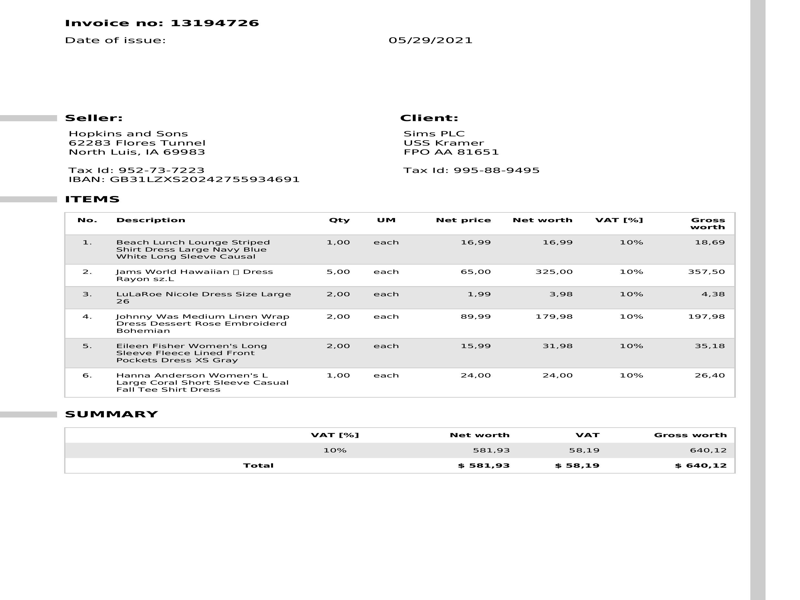

In [19]:
from datasets import load_dataset
dataset_id="mychen76/invoices-and-receipts_ocr_v1"
dataset = load_dataset(dataset_id)

def display_record(record):
    image1 = record['image']
    print("image size:", image1.size)
    display(image1.resize((800,600)))
    return image1

## pull a sample invoice image
input_image = display_record(dataset['test'][1])

In [20]:
import torch
from transformers import DonutProcessor, VisionEncoderDecoderModel

model_id="mychen76/invoice-and-receipts_donut_v1"
def load_model(model_id=model_id):
    processor = DonutProcessor.from_pretrained(model_id)
    model = VisionEncoderDecoderModel.from_pretrained(model_id)
    return processor, model

processor, model = load_model(model_id)

preprocessor_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/510 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.02M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/355 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.90k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/809M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/221 [00:00<?, ?B/s]

In [21]:
def generateTextInImage(processor,model,input_image,task_prompt="<s_receipt>"):
    pixel_values = processor(input_image, return_tensors="pt").pixel_values
    print ("input pixel_values: ",pixel_values.shape)
    task_prompt = "<s_receipt>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt")["input_ids"]
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    outputs = model.generate(pixel_values.to(device),
                               decoder_input_ids=decoder_input_ids.to(device),
                               max_length=model.decoder.config.max_position_embeddings,
                               early_stopping=True,
                               pad_token_id=processor.tokenizer.pad_token_id,
                               eos_token_id=processor.tokenizer.eos_token_id,
                               use_cache=True,
                               num_beams=1,
                               bad_words_ids=[[processor.tokenizer.unk_token_id]],
                               return_dict_in_generate=True,
                               output_scores=True,)
    return outputs

def generateOutputXML(processor,model, input_image, task_start="<s_receipt>",task_end="</s_receipt>"):
    import re
    outputs=generateTextInImage(processor,model,input_image,task_prompt=task_start)
    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
    return sequence

## generate xml
xml=generateOutputXML(processor,model,input_image)
print(xml)

input pixel_values: 
torch.Size([1, 3, 1280, 960])

<s_header><s_invoice_no> 13194726</s_invoice_no><s_invoice_date> 05/29/2021</s_invoice_date><s_seller> Hopkins and 
Sons 62283 Flores Tunnel North Luis, IA 69983</s_seller><s_client> Sims PLC USS Kramer FPO AA 
81651</s_client><s_seller_tax_id> 952-73-7223</s_seller_tax_id><s_client_tax_id> 
995-88-9495</s_client_tax_id><s_iban> GB31LZX520242755934691</s_iban></s_header><s_items><s_item_desc> Beach Lunch 
Lounge Striped Shirt Dress Large Navy Blue White Long Sleeve Casual</s_item_desc><s_item_qty> 
1,00</s_item_qty><s_item_net_price> 16,99</s_item_net_price><s_item_net_worth> 16,99</s_item_net_worth><s_item_vat>
10%</s_item_vat><s_item_gross_worth> 18,69</s_item_gross_worth><sep/><s_item_desc> Jams World Hawaiian 0 Dress 
Rayon SZ.L</s_item_desc><s_item_qty> 5,00</s_item_qty><s_item_net_price> 65,00</s_item_net_price><s_item_net_worth>
325,00</s_item_net_worth><s_item_vat> 10%</s_item_vat><s_item_gross_worth> 
357,50</s_item_gross_worth><sep/><s_item_desc> LuLaRoe Nicole Dress Size Large 26</s_item_desc><s_item_qty> 
2,00</s_item_qty><s_item_net_price> 1,99</s_item_net_price><s_item_net_worth> 3,98</s_item_net_worth><s_item_vat> 
10%</s_item_vat><s_item_gross_worth> 4,38</s_item_gross_worth><sep/><s_item_desc> phynny Was Medium Linen Wrap 
Dress Dessert Rose Embroidered Bohemian</s_item_desc><s_item_qty> 2,00</s_item_qty><s_item_net_price> 
89,99</s_item_net_price><s_item_net_worth> 179,98</s_item_net_worth><s_item_vat> 
10%</s_item_vat><s_item_gross_worth> 197,98</s_item_gross_worth><sep/><s_item_desc> Eileen Fisher Women's Long 
Sleeve Fleece Lined Front Pockets Dress XS Gray</s_item_desc><s_item_qty> 2,00</s_item_qty><s_item_net_price> 
15,99</s_item_net_price><s_item_net_worth> 31,98</s_item_net_worth><s_item_vat> 
10%</s_item_vat><s_item_gross_worth> 35,18</s_item_gross_worth><sep/><s_item_desc> Hanna Anderson Women's L Large 
Coral Short Sleeve Casual Fall Tee Shirt Dress</s_item_desc><s_item_qty> 1,00</s_item_qty><s_item_net_price> 
24,00</s_item_net_price><s_item_net_worth> 24,00</s_item_net_worth><s_item_vat> 
10%</s_item_vat><s_item_gross_worth> 26,40</s_item_gross_worth></s_items><s_summary><s_total_net_worth> 
$581,93</s_total_net_worth><s_total_vat> $58,19</s_total_vat><s_total_gross_worth> $ 
640,12</s_total_gross_worth></s_summary>